In [52]:
import numpy as np
from sklearn.model_selection import train_test_split

#全部資料
raw_data_cnt = 1095
used_data = []
y_train = []
raw_data = []

#讀取資料
for x in range(raw_data_cnt):
    with open('./textdata/'+str(x+1)+'.txt', 'r') as file:
        file_contents = file.read()
        raw_data.append(file_contents)

#讀取訓練資料
with open("training_new.txt", 'r') as file:
    training_data = file.read()
    training_data = training_data.split('\n')
    training_data = [x.split(' ') for x in training_data]
    for x in range(len(training_data)):
        training_data[x] = training_data[x][0:-1]
        training_data[x] = [int(y) for y in training_data[x]]

#分割資料
x_train = []
for x in range(len(training_data)):
    for y in range(1, len(training_data[x])):
        x_train.append(raw_data[training_data[x][y]-1])
        y_train.append(training_data[x][0])

x_train = np.array(x_train)
y_train = np.array(y_train)

#分割訓練資料，測試資料
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=3, stratify = y_train)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier

# Create the vectorizer and classifier
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(x_train)

# Create a one-vs-all classifier using BernoulliNB
BernoulliNBmodel = OneVsRestClassifier(BernoulliNB())
BernoulliNBmodel.fit(X, y_train)

OneVsRestClassifier(estimator=BernoulliNB())

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer and classifier
TFID_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
TFID_vector = TFID_vectorizer.fit_transform(x_train)   
output = TFID_vector.toarray()


In [55]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

# Create a one-vs-all classifier using SVM with a linear kernel
model_linear = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
model_linear.fit(TFID_vector, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True))

In [56]:
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier

# Create a one-vs-all classifier using SVM with a linear kernel
model_rbf = OneVsRestClassifier(svm.SVC(kernel='rbf', probability=True))
model_rbf.fit(TFID_vector, y_train)

OneVsRestClassifier(estimator=SVC(probability=True))

In [57]:
from sklearn.metrics import classification_report

# Split TFID_vector into training and testuation sets
TFID_vector_test = TFID_vectorizer.transform(x_test)

# Make predictions using the BernoulliNB model
X_test = vectorizer.transform(x_test)
y_pred_bnb = BernoulliNBmodel.predict(X_test)
report_bnb = classification_report(y_test, y_pred_bnb)

# Make predictions using the linear SVM model
y_pred_linear = model_linear.predict(TFID_vector_test)
report_linear = classification_report(y_test, y_pred_linear)

# Make predictions using the RBF SVM model
y_pred_rbf = model_rbf.predict(TFID_vector_test)
report_rbf = classification_report(y_test, y_pred_rbf)

print("BernoulliNB Model:")
print(report_bnb)
print("Linear SVM Model:")
print(report_linear)
print("RBF SVM Model:")
print(report_rbf)


BernoulliNB Model:
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      0.50      0.67         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         1

    accuracy                           0.80        20
   macro avg       0.79      0.77      0.76        20
weighted avg       0.83      0.80      0.78        20

Linear SVM Model:
              precision    recall  f1-scor

/Users/yl/Library/Caches/pypoetry/virtualenvs/text-processing-dU80QEBk-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yl/Library/Caches/pypoetry/virtualenvs/text-processing-dU80QEBk-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/yl/Library/Caches/pypoetry/virtualenvs/text-processing-dU80QEBk-py3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels w

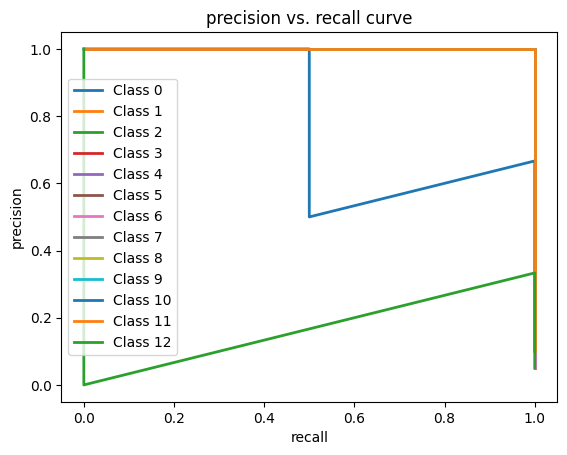

In [58]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob_bnb = BernoulliNBmodel.predict_proba(X_test)

# For each class
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob_bnb[:, i])
    plt.plot(recall, precision, lw=2, label='Class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

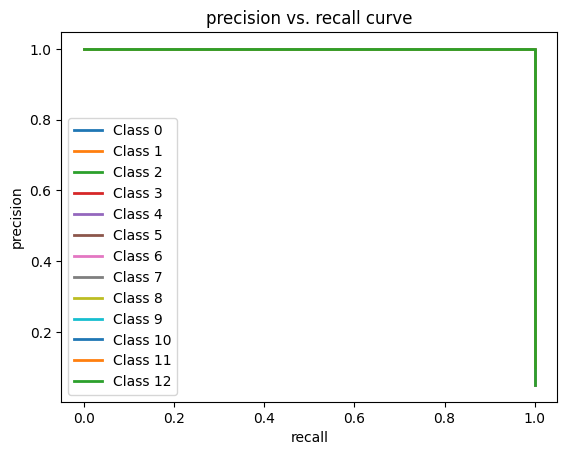

In [59]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob_bnb = model_linear.predict_proba(TFID_vector_test)

# For each class
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob_bnb[:, i])
    plt.plot(recall, precision, lw=2, label='Class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

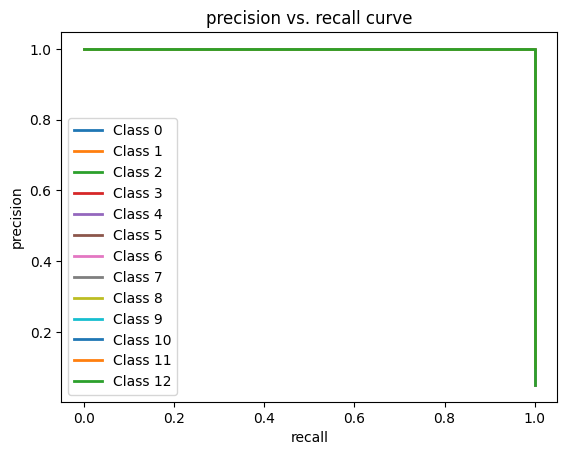

In [60]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_prob_bnb = model_rbf.predict_proba(TFID_vector_test)

# For each class
for i in range(y_test_bin.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob_bnb[:, i])
    plt.plot(recall, precision, lw=2, label='Class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split

raw_data_cnt = 1095
used_data = []
y_train = []

raw_data = []
for x in range(raw_data_cnt):
    with open('./textdata/'+str(x+1)+'.txt', 'r') as file:
        file_contents = file.read()
        raw_data.append(file_contents)

with open("training_new.txt", 'r') as file:
    training_data = file.read()
    training_data = training_data.split('\n')
    training_data = [x.split(' ') for x in training_data]
    for x in range(len(training_data)):
        training_data[x] = training_data[x][0:-1]
        training_data[x] = [int(y) for y in training_data[x]]

x_train = []
for x in range(len(training_data)):
    for y in range(1, len(training_data[x])):
        x_train.append(raw_data[training_data[x][y]-1])
        y_train.append(training_data[x][0])

x_train = np.array(x_train)
y_train = np.array(y_train)

training_data = np.array(training_data)
training_data = np.delete(training_data, 0, 1)
training_data = training_data.flatten()
training_data.sort()

raw_data = np.array(raw_data)
predict = np.delete(raw_data, training_data-1)


from sklearn.feature_extraction.text import TfidfVectorizer
TFID_vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
TFID_vector = TFID_vectorizer.fit_transform(x_train)
output = TFID_vector.toarray()

from sklearn import svm
model_linear = svm.SVC(kernel='linear', probability=True)
model_linear.fit(TFID_vector, y_train)
# do grid search 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['linear', 'rbf'], 'C': [1.1, 1.2, 1.3, 1, 10, 100, 1000]}]
scores = ['precision', 'recall']
for score in scores:
    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(TFID_vector, y_train)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    # set the best model as the model to be used
    model_linear = clf.best_estimator_
    print("The best model is:")
    print(model_linear)

    

raw_data_tfid = TFID_vectorizer.transform(predict)
y_pred = model_linear.predict(raw_data_tfid)
# save the prediction to a csv
import csv
with open('prediction2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Id', 'Value'])
    i = 0
    for x in range(raw_data_cnt):
        if x+1 not in training_data:
            writer.writerow([x+1, y_pred[i]])
            i+=1

The best model is:
SVC(C=1.1, kernel='linear')
The best model is:
SVC(C=1.1, kernel='linear')
